In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
data = make_blobs(n_samples=2000,centers = [[1,1],[-1,-1]],cluster_std=0.7,random_state=2018)
X =data[0]
y = data[1]

In [5]:
data

(array([[ 2.21248793,  0.62002236],
        [-1.85080174, -1.54962444],
        [ 0.71166944,  0.17673398],
        ...,
        [ 0.79199561,  1.51541651],
        [-0.7829834 , -0.38137935],
        [ 1.77210258,  0.6780232 ]]), array([0, 1, 0, ..., 0, 1, 0]))

In [6]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters,random_state=2018)
kmeans.fit(X)
pre_y = kmeans.predict(X)
inertias = kmeans.inertia_
adjusted_rand_s = metrics.adjusted_rand_score(y,pre_y)
mutual_info_s = metrics.mutual_info_score(y,pre_y)
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y,pre_y)
homogeneity_s = metrics.homogeneity_score(y,pre_y)
completness_s = metrics.completeness_score(y,pre_y)
v_measure_s = metrics.v_measure_score(y,pre_y)
df_metrics = pd.DataFrame([[inertias,adjusted_rand_s,mutual_info_s,adjusted_mutual_info_s,homogeneity_s,completness_s,v_measure_s]],
                         columns = ['ine','tARI','tMI','tAMI','thomo','tcomp','tv_m'])
df_metrics

,ine,tARI,tMI,tAMI,thomo,tcomp,tv_m
0,1880.081227,0.936992,0.611143,0.88165,0.881693,0.881695,0.881694


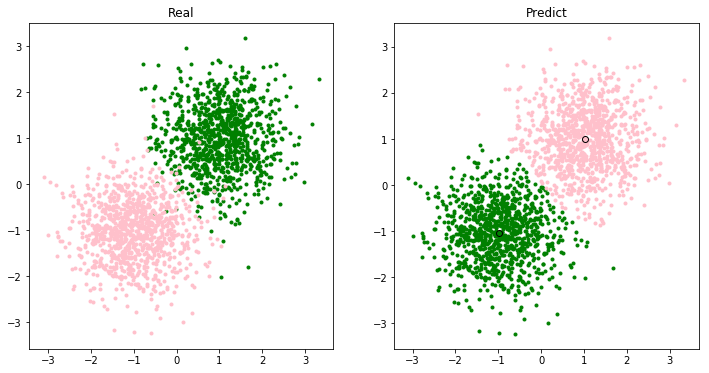

In [7]:
centers = kmeans.cluster_centers_
colors = ['green','pink']
plt.figure(figsize = (12,6))
titles = ['Real','Predict']
for j,y_ in enumerate([y,pre_y]):
    plt.subplot(1,2,j+1)
    plt.title(titles[j])
    #循环读取类别
    for i in range(n_clusters):
        #找到相同的索引
        index_sets = np.where(y_ == i)
        #将相同的类划分为一个聚类子集
        cluster = X[index_sets]
        #展示样本点
        plt.scatter(cluster[:,0],cluster[:,1],c = colors[i],marker = '.')
        if j == 1:
            #簇中心
            plt.plot(centers[i][0],centers[i][1],'o',markerfacecolor = colors[i],markeredgecolor = 'k',markersize = 6)
            
plt.show()

In [8]:
centers

array([[-0.99132395, -1.03995779],
       [ 1.02082077,  0.99886943]])